In [1]:
from sympy import *
init_printing()
from dtumathtools import *

# Aksel-leje projekt

Danmarks Tekniske Universitet\
Advanced Engineering Mathematics 1


## 1. Kompleks stivhed

#### 1.1



Nedenstende sammenhæng skal vises:

$x (t)=A \cdot \cos (\mathit{wt} +\varphi)=Re (A \cdot {\mathrm e}^{{i} {({\mathit{wt}} {+}{\varphi})}})$

Vi ved at følgende gælder:

${\mathrm e}^{{\mathit{iv}}}=\cos (v)+i \cdot \sin (v)
\\
 \Rightarrow 
\\
 {\mathrm e}^{{i} {({\mathit{wt}} {+}{\varphi})}}=\cos (\mathit{wt} +\varphi)+i \cdot \sin (\mathit{wt} +\varphi)$

Når amplituden indsættes, kan det omskrives således:

 $\Rightarrow$

 $A {\mathrm e}^{{i} {({\mathit{wt}} {+}{\varphi})}}=A (\cos (\mathit{wt} +\varphi)+i \cdot \sin (\mathit{wt} +\varphi))$

Når man tager reeldelen af dette, kan man altså omskrive det til:

$\Rightarrow$

 $Re (A {\mathrm e}^{{i} {({\mathit{wt}} {+}{\varphi})}})=Re (A (\cos (\mathit{wt} +\phi)+i \cdot \sin (\mathit{wt} +\phi)))=A \cdot \cos (\mathit{wt} +\varphi)$

 Hvilket var det vi skulle vise, altså at:

$x (t)=A \cdot \cos (\mathit{wt} +\varphi)=Re (A \cdot {\mathrm e}^{{i} {({\mathit{wt}} {+}{\varphi})}})$


**Vi skal finde et udtryk for A og $\phi$, udtryk ved a og b.**

In [2]:
a,b,x,t,w,phi,A = symbols('a b x t w phi A', real=True)

In [3]:
Eq(a*cos(w*t)+b*sin(w*t), (A*(cos(w*t)*cos(phi)-sin(w*t)*sin(phi))).expand())

In [4]:
eq1 = Eq(a, A*cos(phi))
eq2 = Eq(b, -A*sin(phi))

eq1, eq2

In [5]:
lign = Eq(a**2 + b**2, (A*cos(phi))**2 + (-A*sin(phi))**2)
lign2 = Eq(a/b, (A*cos(phi)) / (-A*sin(phi)))
A_sol = solve(lign, A)[1]

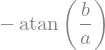

In [6]:
phi_sol = solve(lign2.simplify(),phi)[0]
phi_sol

#### 1.2

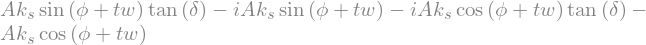

In [7]:
delta, k_s = symbols('delta k_s', real=True)
n = symbols('n')
k = k_s*(1+tan(delta)*I)
z = A*(cos(w*t+phi)+I*sin(w*t+phi))
x = re(z)
F_fhm = re(-k*z)
display((-k*z).expand(), F_fhm.expand())

In [8]:
a_sol = -A*k_s
b_sol = A*k_s*tan(delta)
display(a_sol, b_sol)

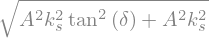

In [9]:
A_F = A_sol.subs({a:a_sol,b:b_sol})
A_F

In [10]:
phi_F = phi_sol.subs({a:a_sol,b:b_sol})
phi_F

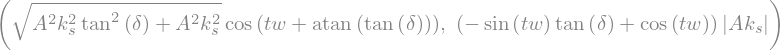

In [24]:
Af, phi_f = symbols('A_f phi_f', real=True)
Ft_fhm = (A_F*cos(w*t+phi_F))
Ft_fhm, Ft_fhm.simplify()

#### 1.3

In [13]:
x = re(z)
x

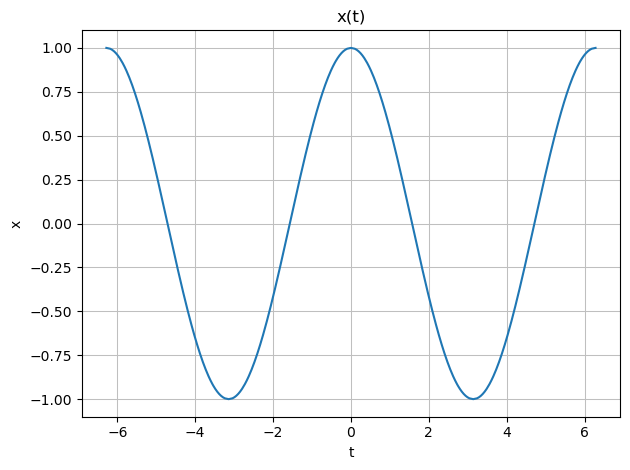

In [14]:
dtuplot.plot(x.subs({A:1, phi:0, w:1}), (t,-2*pi,2*pi), xlabel='t', ylabel='x', title='x(t)')

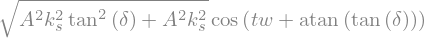

In [60]:
Ft_fhm

In [64]:
Ft_fhm2 = -(k_s*A)/cos(delta)*cos(w*t+phi+delta)
def F_func(ks, d):
    return Ft_fhm.subs({A: 1, phi:0, w:1, k_s:ks, delta: d})
    
def F_func2(ks, d):
    return Ft_fhm2.subs({A: 1, phi:0, w:1, k_s:ks, delta: d}).simplify()

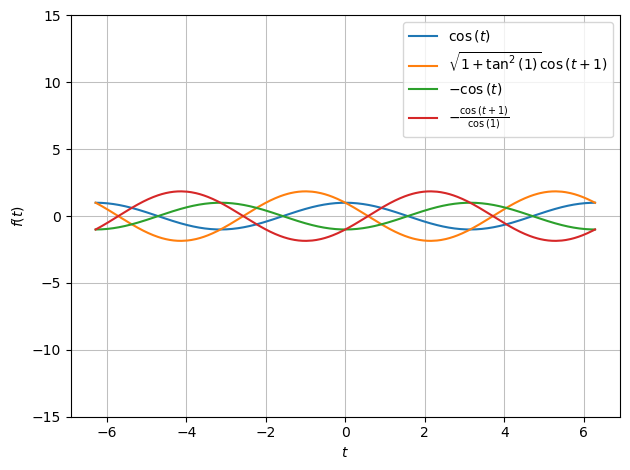

In [65]:
p1 = dtuplot.plot(F_func(1, 0), (t,-2*pi,2*pi), ylim = (-15,15), show=False)
p2 = dtuplot.plot(F_func(1, 1), (t,-2*pi,2*pi), ylim = (-15,15), show=False)
p3 = dtuplot.plot(F_func(1, 2), (t,-2*pi,2*pi), ylim = (-15,15), show=False)
p4 = dtuplot.plot(F_func(1, 3), (t,-2*pi,2*pi), ylim = (-15,15), show=False)
p5 = dtuplot.plot(F_func2(1, 0), (t,-2*pi,2*pi), ylim = (-15,15), show=False)
p6 = dtuplot.plot(F_func2(1, 1), (t,-2*pi,2*pi), ylim = (-15,15), show=False)
comb = p1+p2+p5+p6
comb.show()

In [51]:
fx = x.subs({A:1, phi:0, w:1})
fx

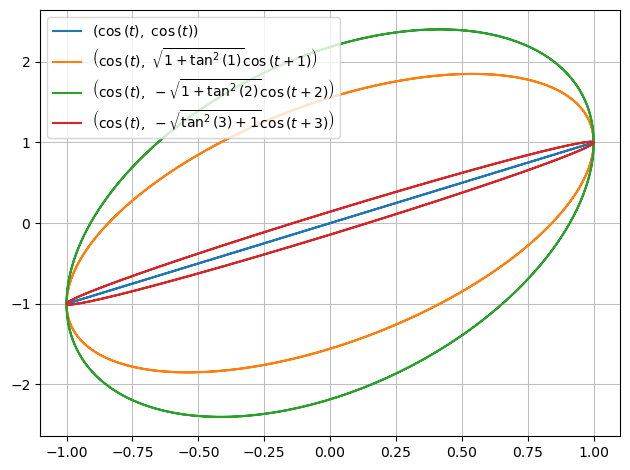

In [52]:
p1 = dtuplot.plot_parametric(*Matrix([fx,F_func(1, 0)]), (t,-2*pi,2*pi), use_cm=False, show=False)
p2 = dtuplot.plot_parametric(*Matrix([fx,F_func(1, 1)]), (t,-2*pi,2*pi), use_cm=False, show=False)
p3 = dtuplot.plot_parametric(*Matrix([fx,F_func(1, 2)]), (t,-2*pi,2*pi), use_cm=False, show=False)
p4 = dtuplot.plot_parametric(*Matrix([fx,F_func(1, 3)]), (t,-2*pi,2*pi), use_cm=False, show=False)
comb = p1+p2+p3+p4
comb.show()

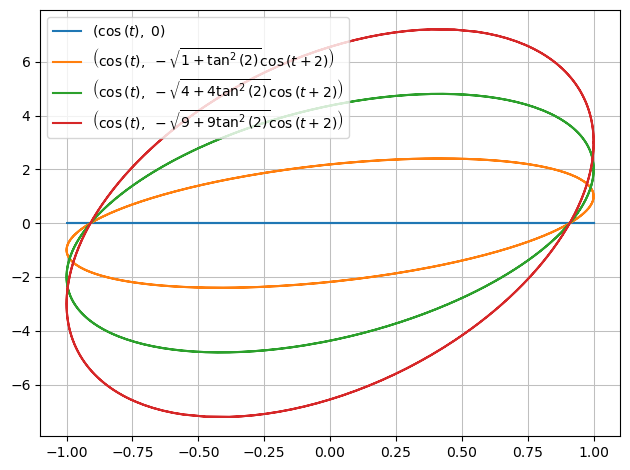

In [53]:
p1 = dtuplot.plot_parametric(*Matrix([fx,F_func(0, 2)]), (t,-2*pi,2*pi), use_cm=False, show=False)
p2 = dtuplot.plot_parametric(*Matrix([fx,F_func(1, 2)]), (t,-2*pi,2*pi), use_cm=False, show=False)
p3 = dtuplot.plot_parametric(*Matrix([fx,F_func(2, 2)]), (t,-2*pi,2*pi), use_cm=False, show=False)
p4 = dtuplot.plot_parametric(*Matrix([fx,F_func(3, 2)]), (t,-2*pi,2*pi), use_cm=False, show=False)
comb = p1+p2+p3+p4
comb.show()

#### 1.4

## 2. Frie svingninger i system med én frihedsgrad

#### 2.1

#### 2.2

#### 2.3

#### 2.4

#### 2.5

#### 2.6

#### 2.7

#### 2.8

## 3. Tvungne svingninger i system med én frihedsgrad

#### 3.1

#### 3.2

#### 3.3

#### 3.4

#### 3.5

#### 3.6

#### 3.7

## 4. Modalanalyse af aksel-leje-system

#### 4.1

#### 4.2

#### 4.3

#### 4.4

#### 4.5

#### 4.6

#### 4.7

#### 4.8

## 5. Frekvensrespons af aksel-leje-system

#### 5.1

#### 5.2

#### 5.3

#### 5.4

#### 5.5

#### 5.6

#### 5.7

#### 5.8

#### 5.9